<a href="https://colab.research.google.com/github/gauravk268/HackerEarth-Emotion-Detection-Tom-Jerry-Cartoon/blob/master/hackerearth_deep_learning_challenge_emotion_detection_tom_jerry_cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries

import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#code for sampling image from the video @ 5fps

count = 0
videoFile = "https://drive.google.com/open?id=1ru9a2wbKGXCaWM9cdmbw7aIS4lNFT9tP"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1

while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    cv2.imshow("Sample", frame)
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="/content/drive/My Drive/Colab Notebooks/Sampled_Image_Train/frame%d.jpeg" % count;count+=1
        count+=1
        cv2.imwrite(filename, frame)
        print("*", end="")
    
cap.release()
cv2.destroyAllWindows()
print ("Done!")

Done!


In [0]:
#changing path to the sampled image folder

PATH_OF_TRAIN_IMAGE= '/content/drive/My\ Drive/Colab\ Notebooks/Sampled_Image_Train'

In [4]:
cd {PATH_OF_TRAIN_IMAGE}

/content/drive/My Drive/Colab Notebooks/Sampled_Image_Train


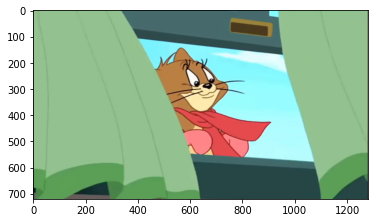

In [5]:
img = plt.imread('frame0.jpeg')   # reading image using its name
plt.imshow(img)

In [6]:
#loading training data

data = pd.read_csv("Copy of Train.csv", header=None, sep='\n')

data.head()

,0
0,"Frame_ID,Emotion"
1,"frame0.jpg,happy"
2,"frame1.jpg,happy"
3,"frame2.jpg,surprised"
4,"frame3.jpg,surprised"
